# Predict whether the Employee of an Organization should get Promotion or Not?



Your client is a large MNC and they have 15 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is: * They first identify a set of employees based on recommendations/ past performance. * Selected employees go through the separate training and evaluation program for each vertical. These programs are based on he required skill of each vertical * At the end of the program, based on various factors such as training performance, an employee gets the promotion

## <center>Data Description</center>

<table>
    <tr>
        <td><b>Variable</b></td>
        <td><b>Definition</b></td>
    </tr>
    <tr>
        <td>employee_id</td>
        <td>Unique ID for employee<td>
    </tr>
    <tr>
        <td>department</td>
        <td>Department of employee</td>
    </tr>
    <tr>
        <td>region</td>
        <td>Region of employment (unordered)</td>
    </tr>
    <tr>
        <td>education</td>
        <td>Education Level</td>
    </tr>
    <tr>
        <td>gender</td>
        <td>Gender of Employee</td>
    </tr>
    <tr>
        <td>recruitment_channel</td>
        <td>Channel of recruitment for employee</td>
    </tr>
    <tr>
        <td>no_of_trainings</td>
        <td>no of other trainings completed in previous year on soft skills, technical skills etc.</td>
    </tr>
    <tr>
        <td>age</td>
        <td>Age of Employee</td>
    </tr>
    <tr>
        <td>previous_year_rating</td>
        <td>Employee Rating for the previous year</td>
    </tr>
    <tr>
        <td>length_of_service</td>
        <td>Length of service in years</td>
    </tr>
    <tr>
        <td>KPIs_met >80%</td>
        <td>if Percent of KPIs(Key performance Indicators) >80% then 1 else 0</td>
    </tr>
    <tr>
        <td>awards_won?</td>
        <td>if awards won during previous year then 1 else 0</td>
    </tr>
    <tr>
        <td>avg_training_score</td>
        <td>Average score in current training evaluations</td>
    </tr>
    <tr>
        <td>is_promoted	(Target)</td>
        <td>Recommended for promotion</td>
    </tr>
</table>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [46]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [47]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [48]:
train.shape

(54808, 14)

In [49]:
test.shape

(23490, 13)

In [50]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [51]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [52]:
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [53]:
test['department'].value_counts()

Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: department, dtype: int64

In [54]:
train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [55]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

# Descriptive Statistics

In [56]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [57]:
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


# Plotting  -> Target -> 0 and 1
# Count plot -> pie chart 

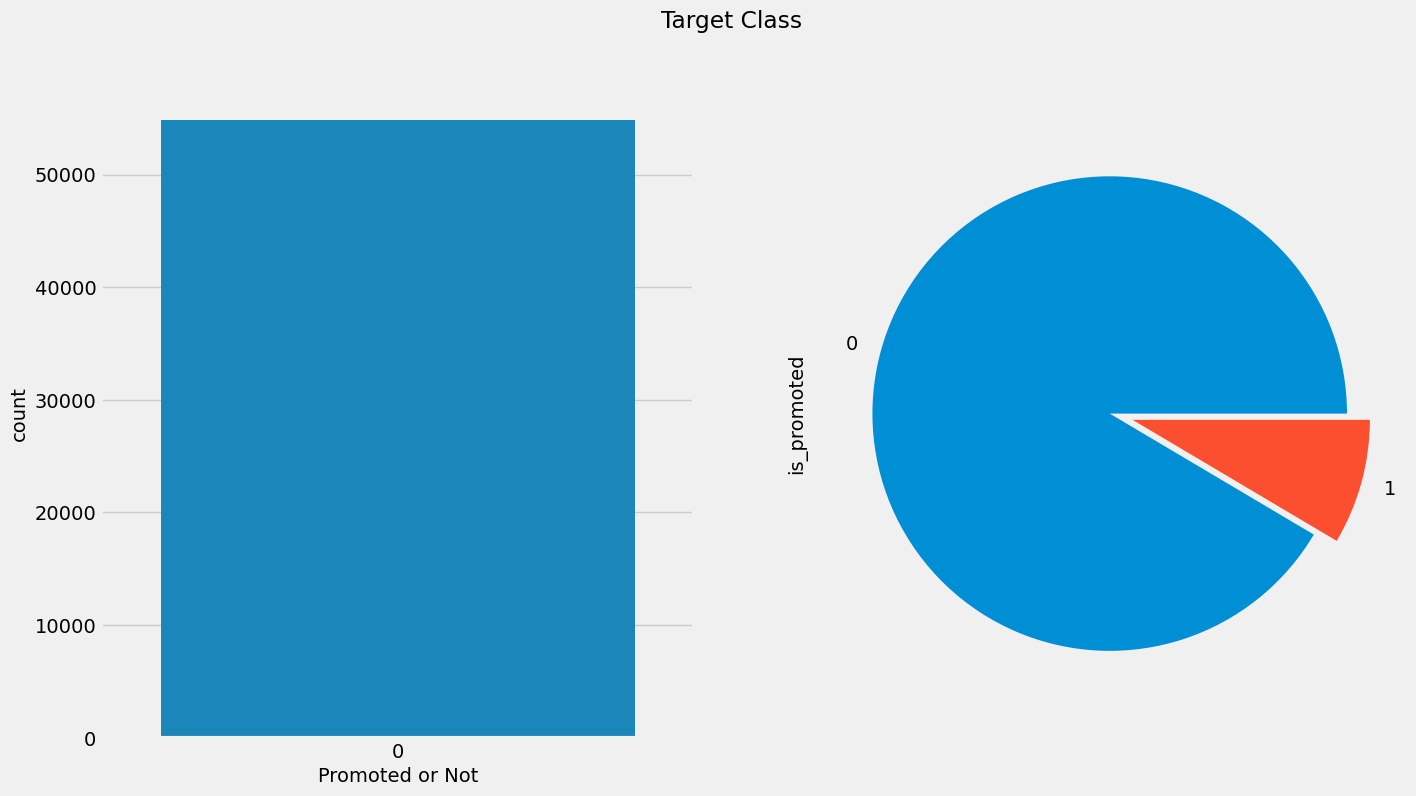

In [58]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'])
plt.xlabel("Promoted or Not")

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], labels = ['0', '1'])
plt.suptitle("Target Class")
plt.show()

In [59]:
# we need to handle imbalanced data first

In [60]:
#Finding Missing values

train_total = train.isnull().sum()

train_percent = (train_total/train.shape[0]*100).round(2)
train_percent

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64

In [61]:
test_total = test.isnull().sum()

test_percent = (test_total/test.shape[0]*100).round(2)
test_percent

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.71
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
dtype: float64

In [62]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Filling missing row with mod value in both train and test data


In [63]:

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

In [64]:
train_total = train.isnull().sum()

train_percent = (train_total/train.shape[0]*100).round(2)
train_percent

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

In [65]:
test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

In [66]:
test_total = test.isnull().sum()

test_percent = (test_total/test.shape[0]*100).round(2)
test_percent

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
dtype: float64

In [67]:
# Outliers handling

train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


In [68]:
train['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

In [69]:
train['length_of_service'].value_counts()

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64

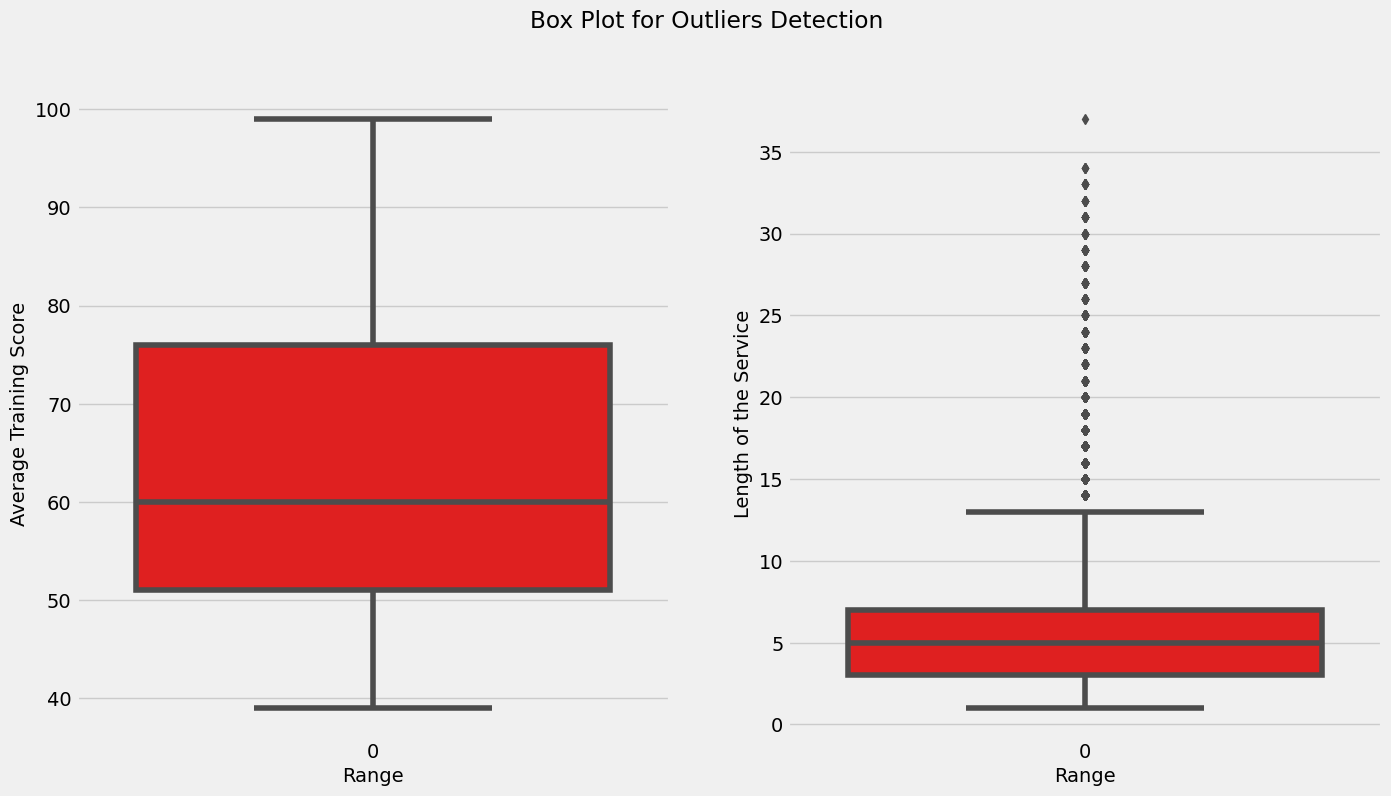

In [70]:
plt.subplot(1,2,1)
sns.boxplot(train['avg_training_score'] , color = 'red')
plt.ylabel('Average Training Score')
plt.xlabel('Range')

plt.subplot(1,2,2)
sns.boxplot(train['length_of_service'] , color = 'red')
plt.ylabel('Length of the Service')
plt.xlabel('Range')

plt.suptitle("Box Plot for Outliers Detection")
plt.show()

In [71]:
# Remove the outliers from length of the service COLUMNS
train = train[train['length_of_service'] < 13]

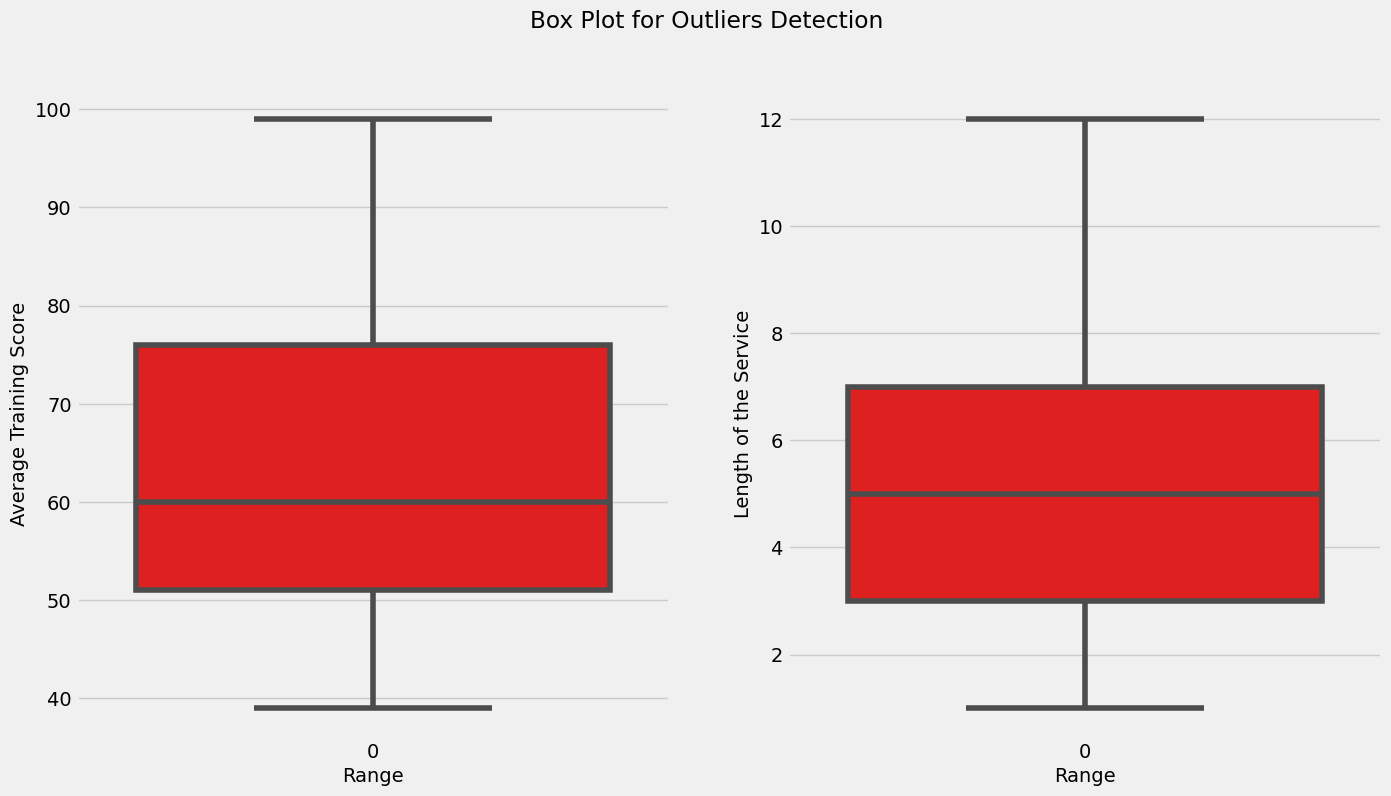

In [72]:
plt.subplot(1,2,1)
sns.boxplot(train['avg_training_score'] , color = 'red')
plt.ylabel('Average Training Score')
plt.xlabel('Range')

plt.subplot(1,2,2)
sns.boxplot(train['length_of_service'] , color = 'red')
plt.ylabel('Length of the Service')
plt.xlabel('Range')

plt.suptitle("Box Plot for Outliers Detection")
plt.show()

# Univariate Analysis
# Bivariate Analysis
# Mutivariate Analysis
# Feature Engineering
# Model Building and Prediction

In [73]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Text(0.5, 1.0, 'awards_won?')

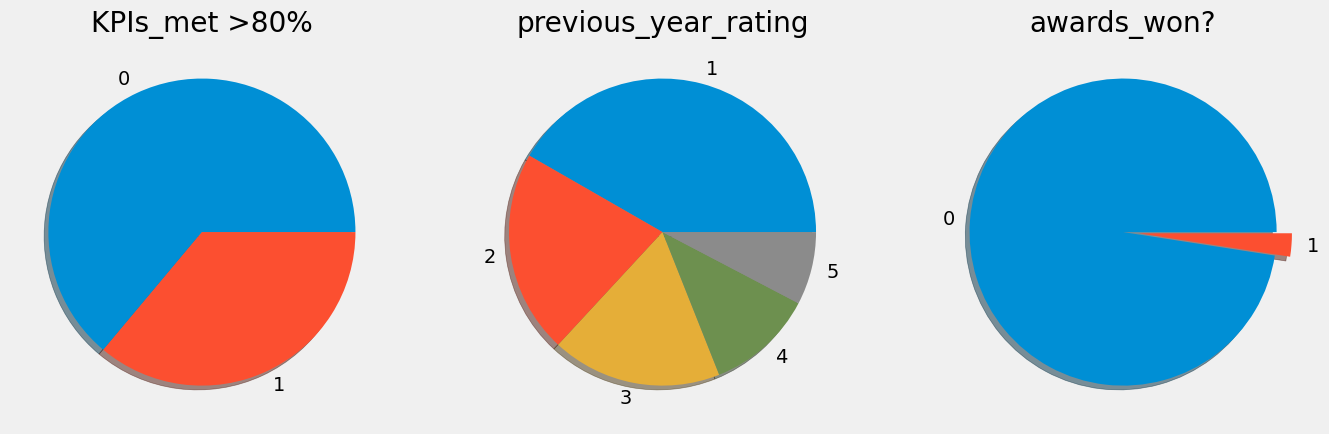

In [76]:
# awards_won , KPIs_met >80 , previous_year_rating -> Pie chart

# first columns: KPIs_met >80 
plt.subplot(1, 3, 1)
labels = ['0', '1']
explode = [0,0]
size = train['KPIs_met >80%'].value_counts()
plt.pie(size,labels = labels, explode = explode ,shadow = True )
plt.title("KPIs_met >80%")

# Second Columns: previous_year_rating

plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
explode = [0,0,0,0,0]
size = train['previous_year_rating'].value_counts()
plt.pie(size,labels = labels, explode = explode ,shadow = True )
plt.title("previous_year_rating")

# Thirs Columns: awards_won
plt.subplot(1, 3, 3)
labels = ['0', '1']
explode = [0,0.1]
size = train['awards_won?'].value_counts()
plt.pie(size,labels = labels, explode = explode ,shadow = True )
plt.title("awards_won?")

In [79]:
train['no_of_trainings'].value_counts()

1     40744
2      7556
3      1696
4       450
5       122
6        39
7        11
8         5
9         5
10        4
Name: no_of_trainings, dtype: int64

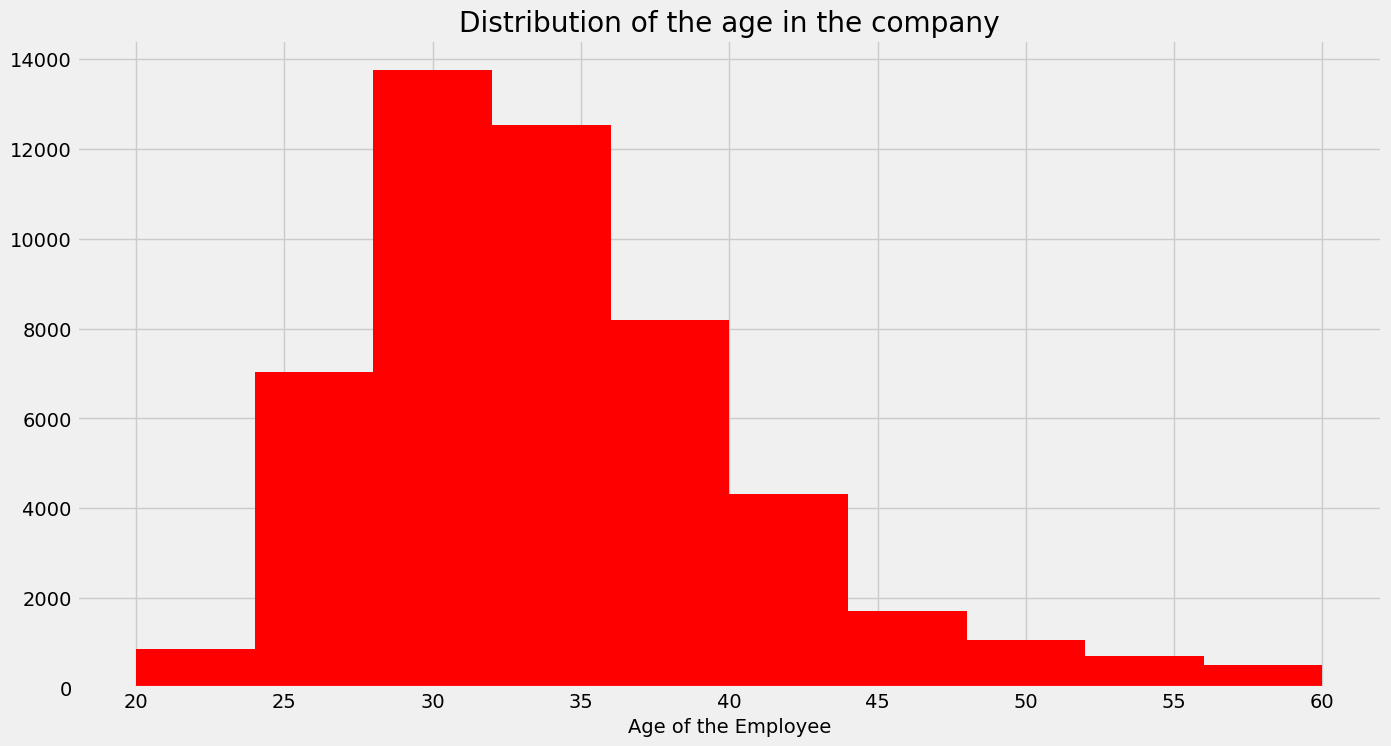

In [80]:
plt.hist(train['age'], color = 'red')
plt.title("Distribution of the age in the company")
plt.xlabel("Age of the Employee")
plt.show()

In [83]:
train.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


Text(0.5, 1.0, 'Region')

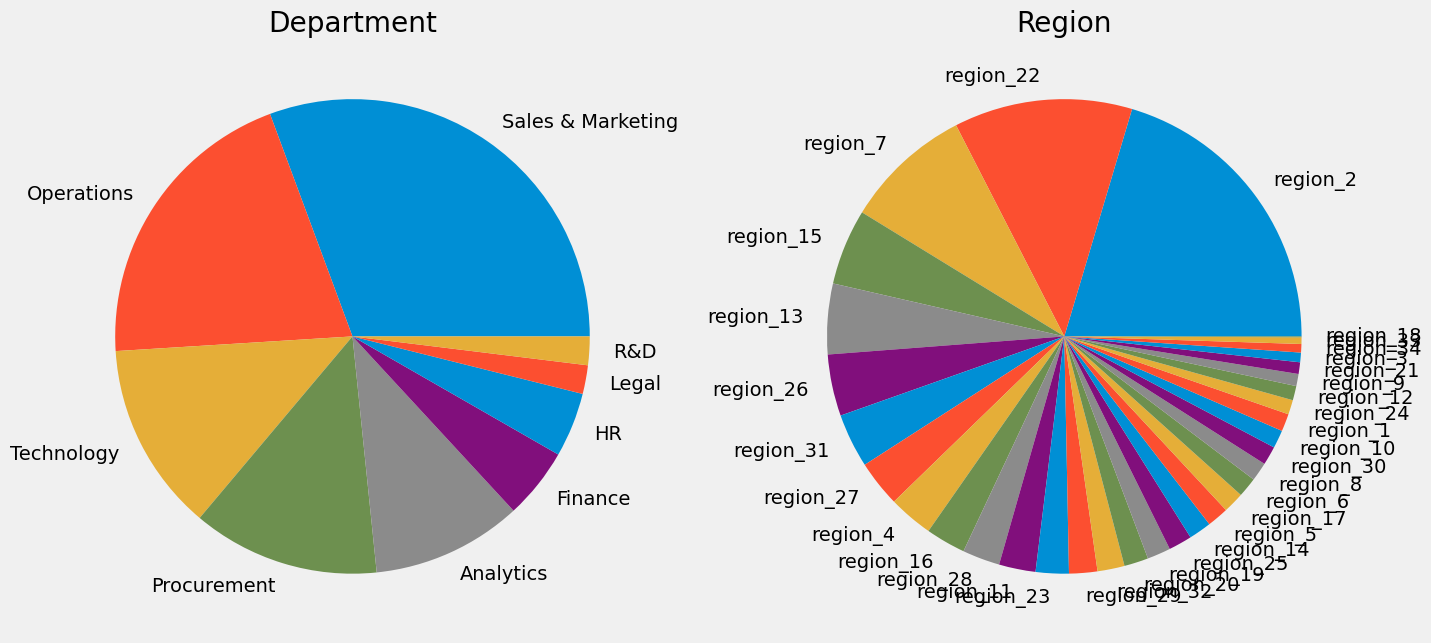

In [89]:
plt.subplot(1, 2, 1)
labels = train['department'].value_counts().index
size = train['department'].value_counts()
explode = None

plt.pie(size, labels = labels, explode = explode)
plt.title("Department")

#region
plt.subplot(1, 2, 2)
labels = train['region'].value_counts().index
size = train['region'].value_counts()
explode = None
plt.pie(size, labels = labels, explode = explode)
plt.title("Region")


Text(0.5, 1.0, 'Recruitment_channel')

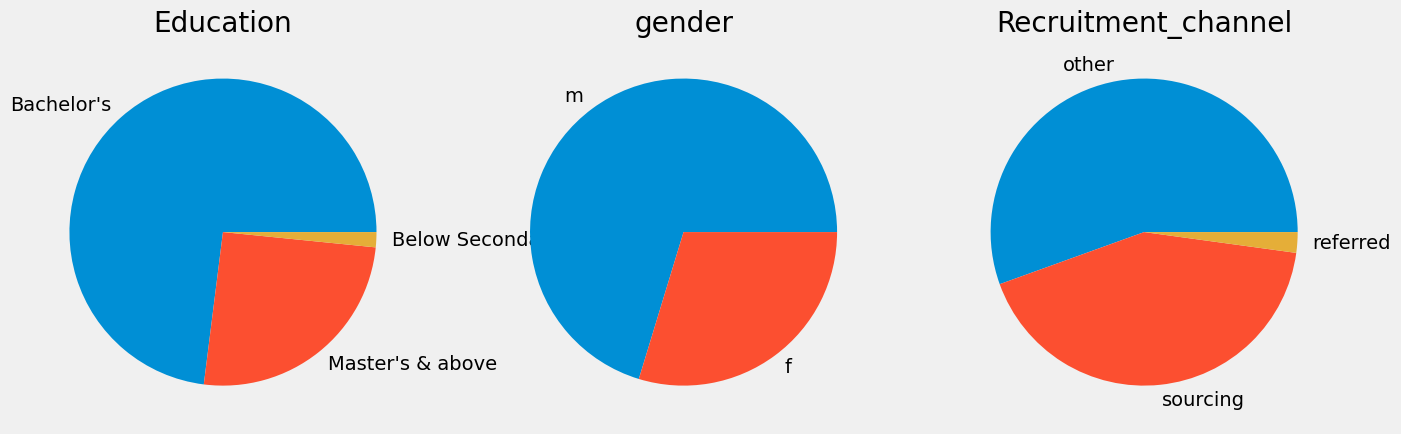

In [91]:
# education	gender	recruitment_channel

# Education
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
size = train['education'].value_counts()
explode = None

plt.pie(size, labels = labels, explode = explode)
plt.title("Education")

#gender
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
size = train['gender'].value_counts()
explode = None
plt.pie(size, labels = labels, explode = explode)
plt.title("gender")

plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
size = train['recruitment_channel'].value_counts()
explode = None
plt.pie(size, labels = labels, explode = explode)
plt.title("Recruitment_channel")

# Bivariate Analysis
- C & C
- C & N
- N & N

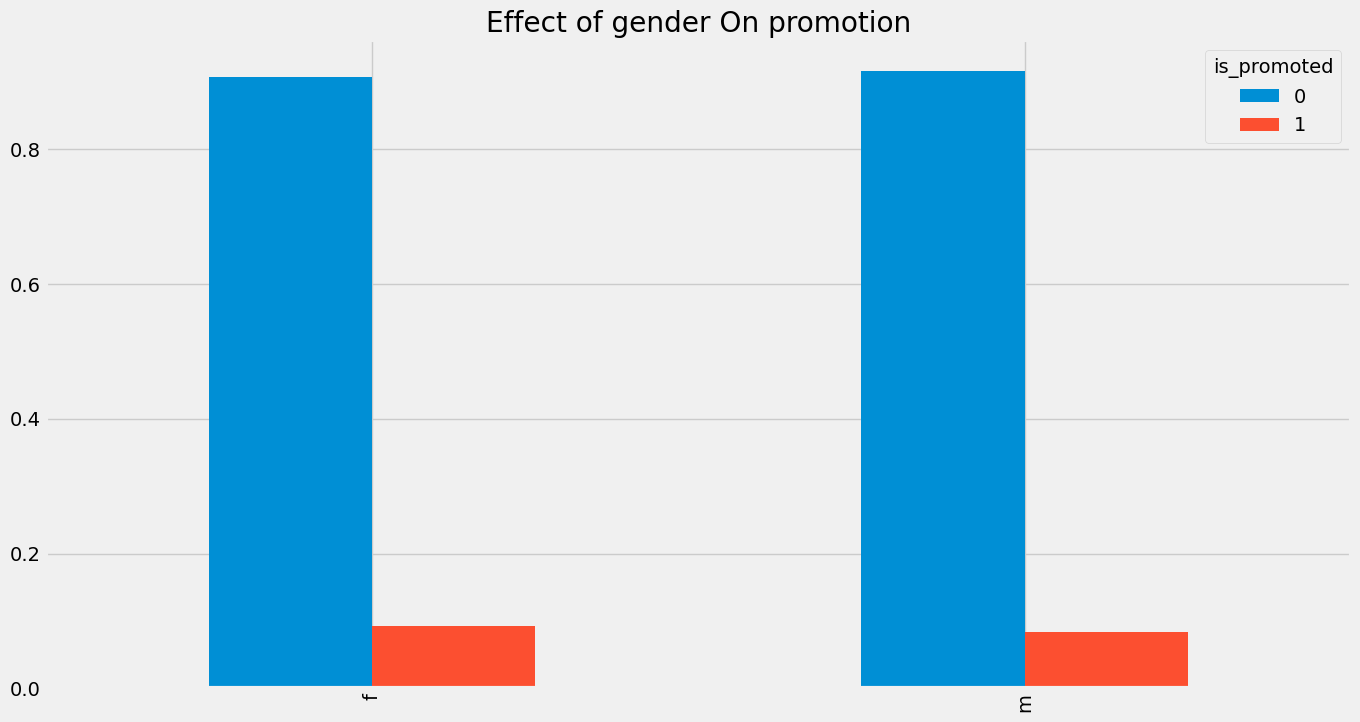

In [94]:
# Gender and Promotion
x = pd.crosstab(train['gender'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title("Effect of gender On promotion")
plt.xlabel("")
plt.show()

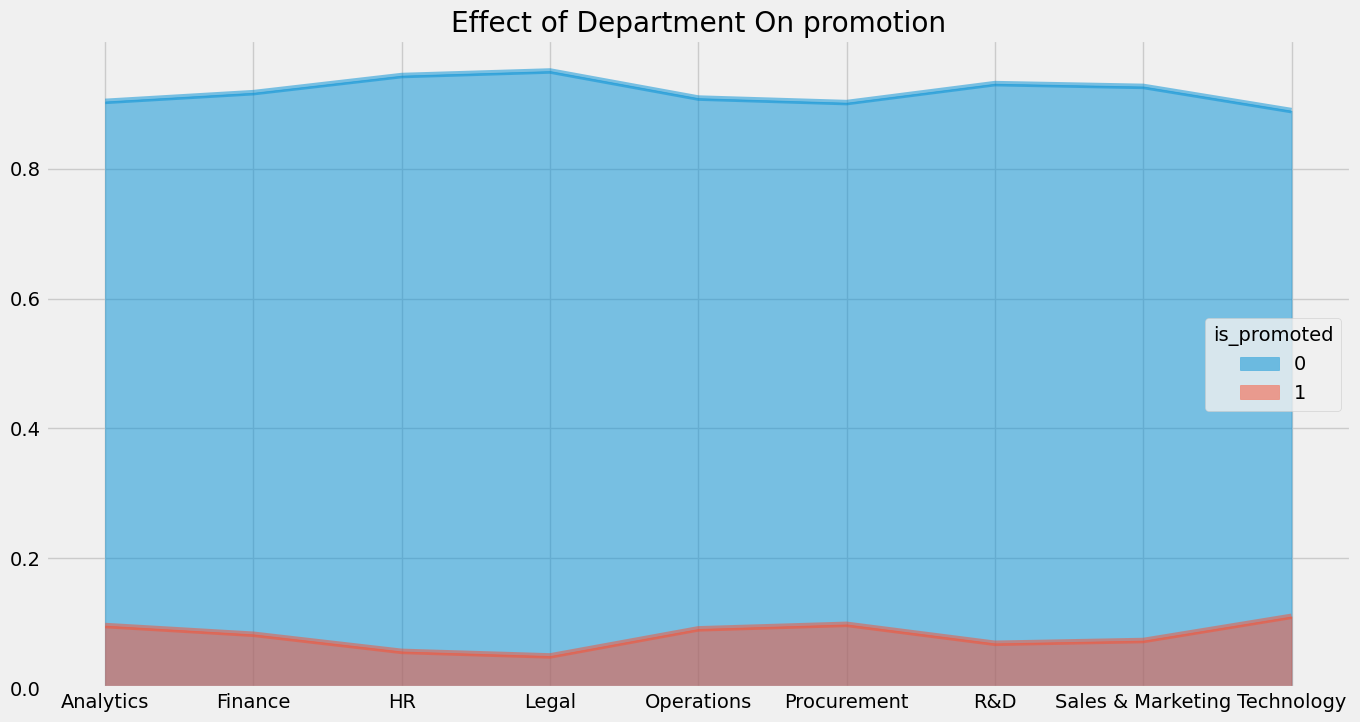

In [97]:
# Departmenet and promotion
x = pd.crosstab(train['department'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title("Effect of Department On promotion")
plt.xlabel("")
plt.show()

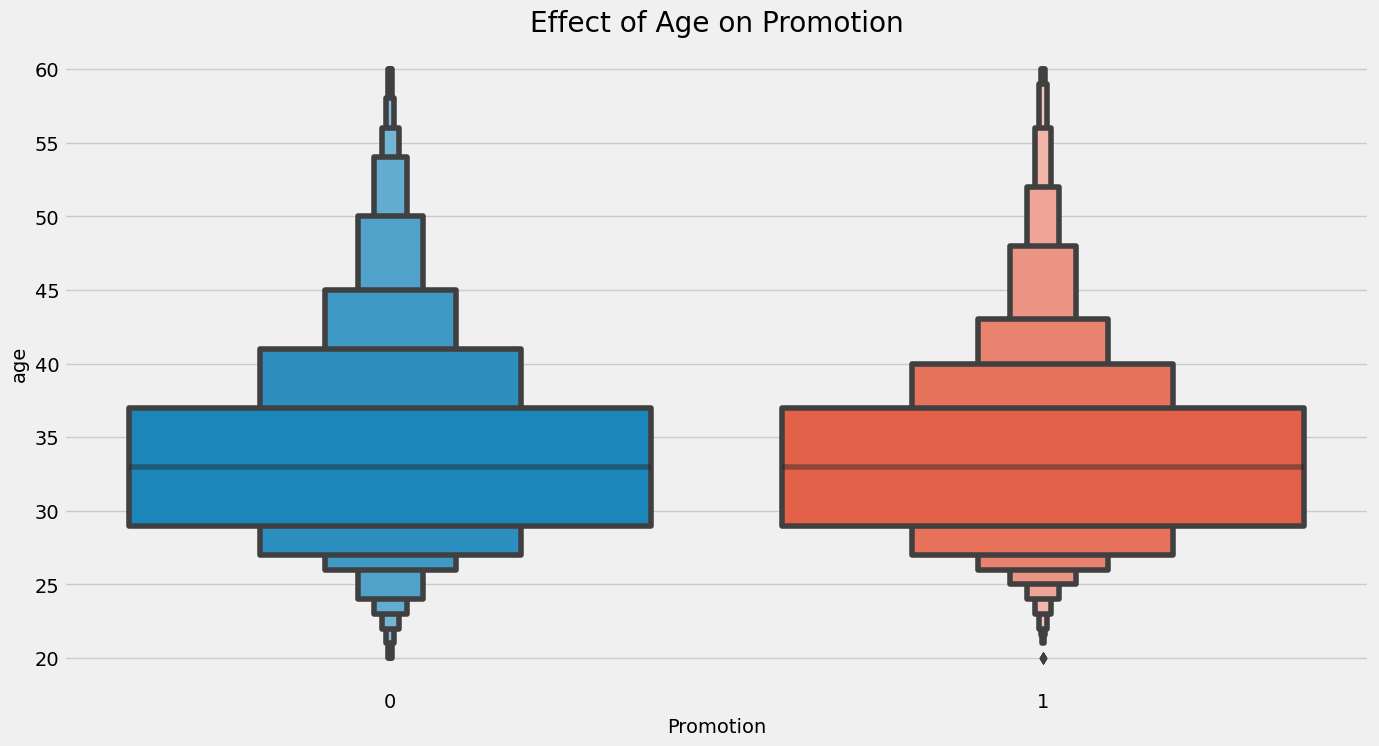

In [100]:
sns.boxenplot(x=train['is_promoted'], y=train['age'])
plt.title("Effect of Age on Promotion")
plt.xlabel("Promotion")
plt.show()

# multivariate Analysis


C:\Users\tarun\AppData\Local\Temp\ipykernel_16332\2414455346.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, cmap = 'Blues')


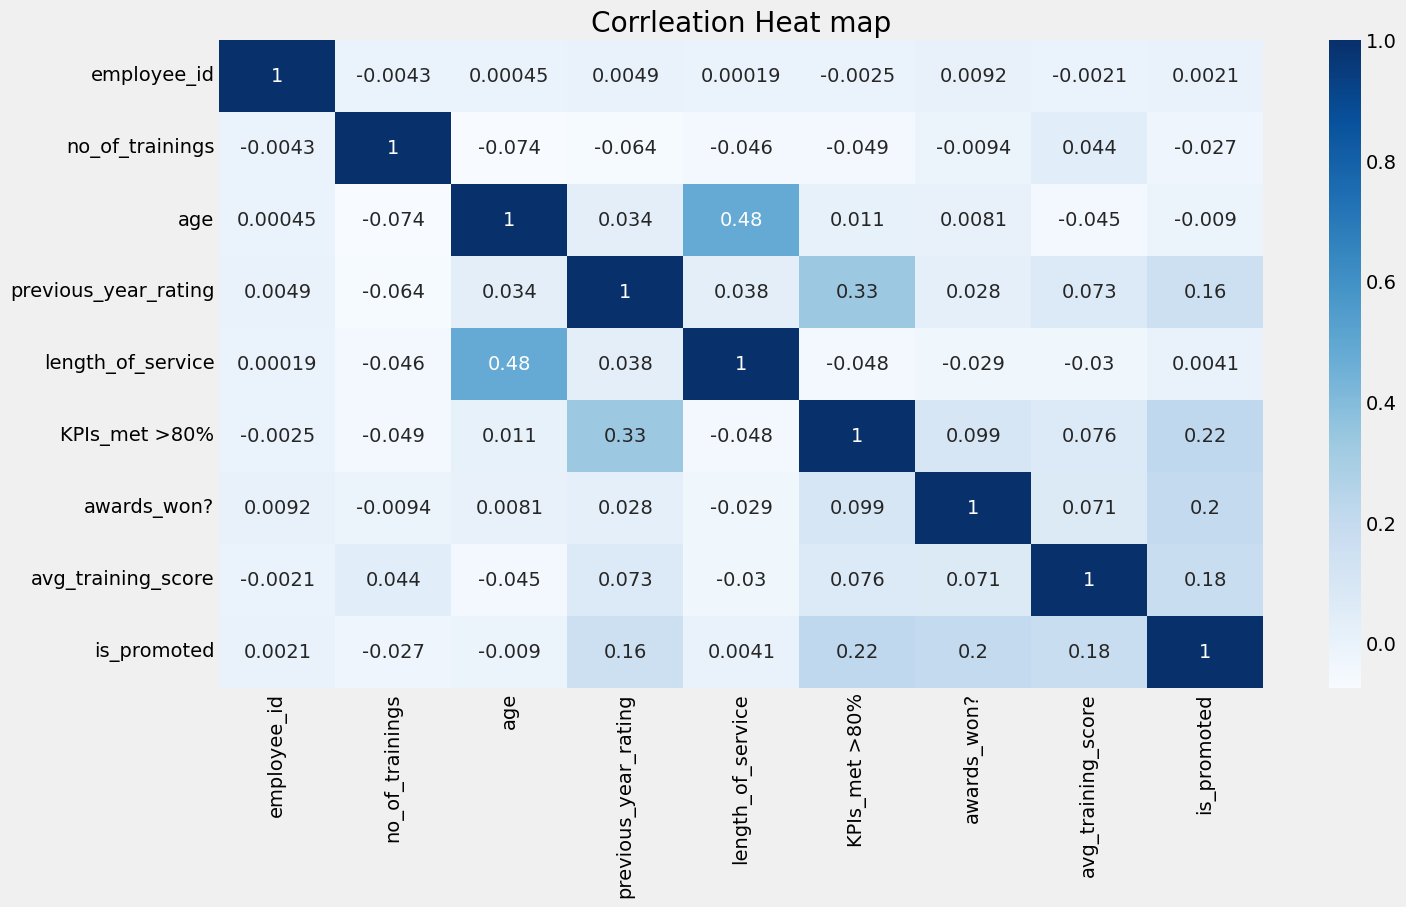

In [103]:
# multivariate Analysis
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
plt.title("Corrleation Heat map")
plt.show()

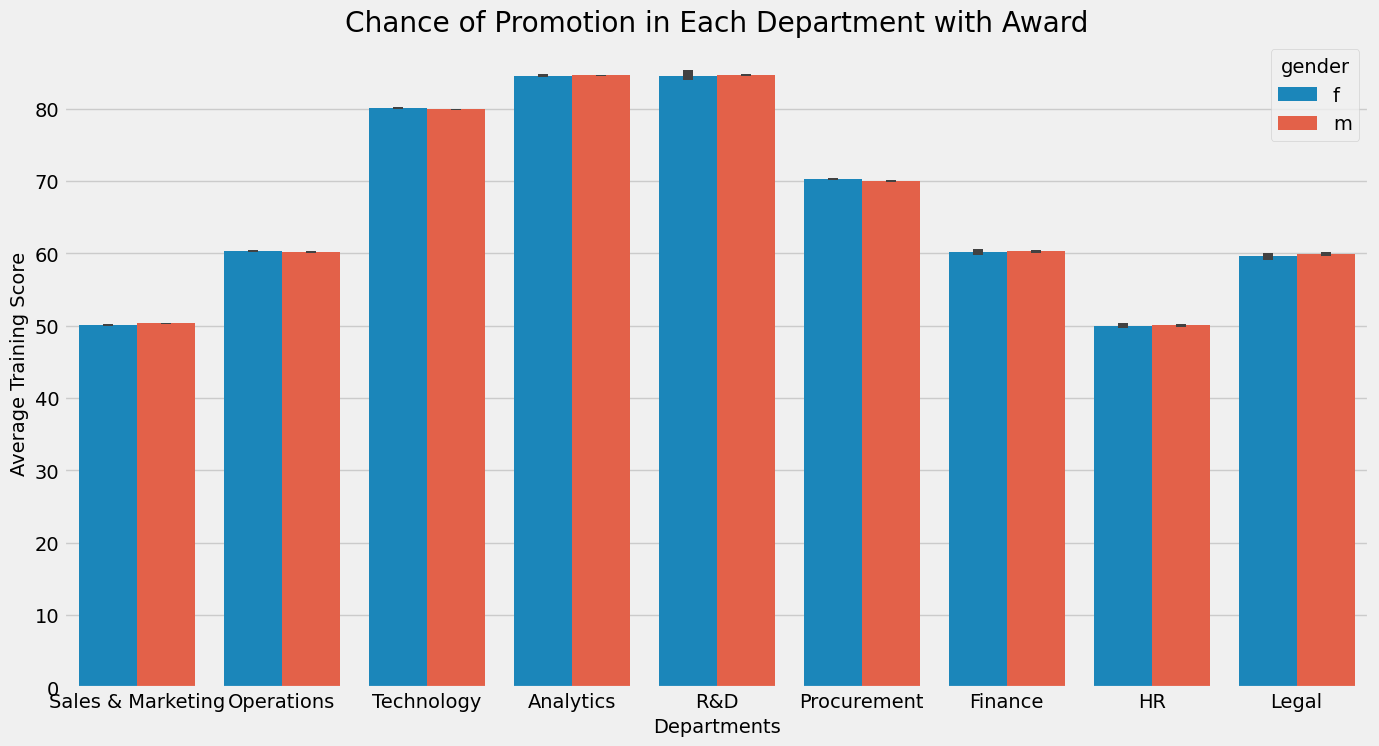

In [105]:
# Department columns and Award sinner
sns.barplot(x=train['department'], y=train['avg_training_score'], hue=train['gender'])
plt.title("Chance of Promotion in Each Department with Award")
plt.xlabel("Departments")
plt.ylabel("Average Training Score")
plt.show()


In [106]:
train.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


# Feature engineering


In [107]:
# Create a metric of sum
train['sum_metric'] = train['awards_won?'] + train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?'] + test['KPIs_met >80%'] + test['previous_year_rating']

# Create a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [108]:
train.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,6.0,49


In [109]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'sum_metric', 'total_score'],
      dtype='object')

In [110]:
# Columns Remove -> Unnecessary columns

train = train.drop(['employee_id', 'region', 'recruitment_channel'], axis = 1)
test = test.drop(['employee_id', 'region', 'recruitment_channel'], axis = 1)

print(train.columns)
print(test.columns)

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')
Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'sum_metric', 'total_score'],
      dtype='object')


In [111]:
# no award winner, No KPIs_met >80%, previous year rating = 1, avg_training score < 60

train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
     (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
31860,Sales & Marketing,Bachelor's,m,1,27,1.0,2,0,0,58,1,1.0,58
51374,Sales & Marketing,Bachelor's,m,1,31,1.0,5,0,0,58,1,1.0,58


In [112]:
train.shape

(50632, 13)

In [113]:
train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

In [114]:
train.shape

(50630, 13)

In [115]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,1,0,49,0,6.0,49
1,Operations,Bachelor's,m,1,30,5.0,4,0,0,60,0,5.0,60
2,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0,0,50,0,3.0,50
3,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0,0,50,0,1.0,100
4,Technology,Bachelor's,m,1,45,3.0,2,0,0,73,0,3.0,73


In [116]:
train.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [117]:
train['education'].value_counts()

Bachelor's          36963
Master's & above    12862
Below Secondary       805
Name: education, dtype: int64

In [118]:
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
le = LabelEncoder()

In [121]:
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])

train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

In [122]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73


In [123]:
# Splitting the data
y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

In [124]:
x.shape

(50630, 12)

In [125]:
y.shape

(50630,)

In [126]:
x_test.shape

(23490, 12)

In [127]:
# handling Imblanced data

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(x,y)

In [128]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [129]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)

(74003, 12)
(74003,)
(18501, 12)
(18501,)
(23490, 12)


In [130]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)
x_test = sc.transform(x_test)

In [131]:
# Model Building

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

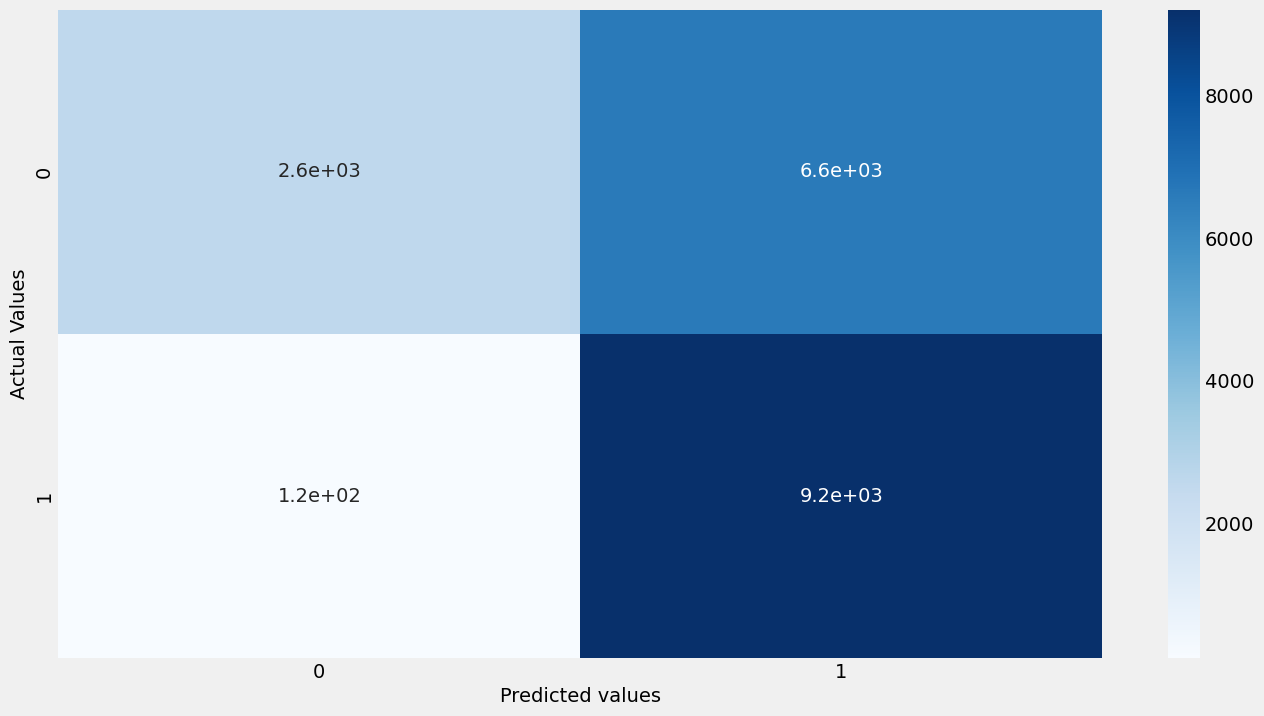

In [134]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()


In [135]:
cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.28      0.43      9187
           1       0.58      0.99      0.73      9314

    accuracy                           0.64     18501
   macro avg       0.77      0.63      0.58     18501
weighted avg       0.77      0.64      0.58     18501



In [139]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73


In [140]:
prediction = model.predict(np.array([[2,
                                    3,
                                    1,
                                    1,
                                    30,
                                    5,
                                    10, 
                                    1,
                                    1,
                                    95,
                                    7,
                                    700]]))
result = "NO"
if prediction == 1:
    result = "YES"


print(" Whether the employee should get promoted or not : ", result)

 Whether the employee should get promoted or not :  YES
